In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.io import save, reset_output, output_notebook
reset_output()
output_notebook()
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import geopandas as gpd
import seaborn as sns

from numpy import log, sqrt

Loading BokehJS ...

In [21]:
tips_sample=pd.read_feather('../preprocessed_data/sample.feather')
# this sample is generated in "full model" notebook, and I read it here directly.

In [22]:
tips_sample

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,total_amount,date,holiday,PRCP,SNOW,SNWD,TAVG,Extrem,weekday
0,2018-03-14 22:52:13,2018-03-14 22:55:20,2,0.70,164,170,2,4.5,0.5,0.5,...,0.0,5.80,2018-03-14,False,0.01,0.0,0.0,2.222222,True,0.0
1,2018-02-06 09:53:25,2018-02-06 10:05:49,1,1.97,239,236,1,10.0,0.0,0.5,...,0.0,13.50,2018-02-06,False,0.00,0.0,0.0,-0.277778,False,0.0
2,2018-02-22 13:05:15,2018-02-22 13:12:47,1,1.10,237,262,1,7.0,0.0,0.5,...,0.0,9.35,2018-02-22,False,0.17,0.0,0.0,8.888889,True,0.0
3,2018-02-08 09:22:02,2018-02-08 09:43:31,4,5.54,170,261,1,21.0,0.0,0.5,...,0.0,26.16,2018-02-08,False,0.00,0.0,0.0,-1.666667,False,0.0
4,2018-03-21 08:30:30,2018-03-21 08:44:51,1,6.00,137,168,1,18.0,0.0,0.5,...,0.0,19.80,2018-03-21,False,0.99,8.2,0.0,1.666667,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096482,2018-08-25 10:10:14,2018-08-25 10:23:03,1,2.23,168,263,1,10.5,0.0,0.5,...,0.0,13.56,2018-08-25,False,0.00,0.0,0.0,23.333333,False,1.0
7096483,2018-07-12 21:55:11,2018-07-12 22:26:03,1,7.60,114,74,1,27.0,0.5,0.5,...,0.0,30.30,2018-07-12,False,0.71,0.0,0.0,23.333333,True,0.0
7096484,2018-08-10 05:22:13,2018-08-10 05:28:46,2,1.10,100,164,2,6.5,0.5,0.5,...,0.0,7.80,2018-08-10,False,0.00,0.0,0.0,26.111111,False,0.0
7096485,2018-07-07 23:50:53,2018-07-07 23:56:27,1,1.20,162,107,1,6.5,0.5,0.5,...,0.0,9.20,2018-07-07,False,0.00,0.0,0.0,21.111111,False,1.0


In [5]:
pip install geopandas

     |████████████████████████████████| 994 kB 355 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 549 kB/s  eta 0:00:01
     |████████████████████████████████| 7.6 MB 8.1 MB/s eta 0:00:01     |██████████████████████▋         | 5.4 MB 8.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

     |████████████████████████████████| 94 kB 366 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyarrow

     |████████████████████████████████| 17.6 MB 10.1 MB/s eta 0:00:01    |██████████████████▏             | 10.0 MB 10.1 MB/s eta 0:00:01     |███████████████████▏            | 10.5 MB 10.1 MB/s eta 0:00:01     |██████████████████████▏         | 12.1 MB 10.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
y_s1 = pd.read_feather('../preprocessed_data/y_s1.feather').drop('index', axis=1)
y_s2 = pd.read_feather('../preprocessed_data/y_s2.feather').drop('index', axis=1)
y_s3 = pd.read_feather('../preprocessed_data/y_s3.feather').drop('index', axis=1)
y_s1

In [9]:
y_s2 = pd.read_feather('../preprocessed_data/y_18s2.feather').drop('index', axis=1)
y_s3 = pd.read_feather('../preprocessed_data/y_18s3.feather').drop('index', axis=1)

In [24]:
data = {'date':tips_sample['date'],
        'passenger_count': tips_sample['passenger_count'],
        'trip_distance':tips_sample['trip_distance'],
        'fare_amount':tips_sample['fare_amount'],
        'tip_amount': tips_sample['tip_amount'],
        'tolls_amount': tips_sample['tolls_amount'],
        'total_amount': tips_sample['total_amount'],
        'PUloc':tips_sample['PULocationID'],
        'DOloc':tips_sample['DOLocationID']}

tips_sample = pd.DataFrame(data)
tips_sample

,date,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,PUloc,DOloc
0,2018-03-14,2,0.70,4.5,0.00,0.0,5.80,164,170
1,2018-02-06,1,1.97,10.0,2.70,0.0,13.50,239,236
2,2018-02-22,1,1.10,7.0,1.55,0.0,9.35,237,262
3,2018-02-08,4,5.54,21.0,4.36,0.0,26.16,170,261
4,2018-03-21,1,6.00,18.0,1.00,0.0,19.80,137,168
...,...,...,...,...,...,...,...,...,...
7096482,2018-08-25,1,2.23,10.5,2.26,0.0,13.56,168,263
7096483,2018-07-12,1,7.60,27.0,2.00,0.0,30.30,114,74
7096484,2018-08-10,2,1.10,6.5,0.00,0.0,7.80,100,164
7096485,2018-07-07,1,1.20,6.5,1.40,0.0,9.20,162,107


In [10]:
# s2
data2 = {'date':y_s2['tpep_pickup_datetime'].str[5:10],
        'passenger_count': y_s2['passenger_count'],
        'trip_distance':y_s2['trip_distance'],
        'fare_amount':y_s2['fare_amount'],
        'PUtime':y_s2['tpep_pickup_datetime'].str[11:13],
        'DOtime':y_s2['tpep_dropoff_datetime'].str[11:13],
        'tip_amount': y_s2['tip_amount'],
        'tolls_amount': y_s2['tolls_amount'],
        'total_amount': y_s2['total_amount'],
        'DOloc': y_s2['DOLocationID']}

y_s2_fare = pd.DataFrame(data2)
y_s2_fare

,date,passenger_count,trip_distance,fare_amount,PUtime,DOtime,tip_amount,tolls_amount,total_amount,DOloc
0,04-01,1,6.70,22.5,00,01,0.00,0.0,23.80,90
1,04-01,2,4.10,15.5,00,00,3.35,0.0,20.15,158
2,04-01,1,0.70,5.5,00,00,1.35,0.0,8.15,249
3,04-01,1,2.50,11.5,00,00,0.00,0.0,12.80,83
4,04-01,1,1.80,8.5,00,01,0.00,0.0,9.80,135
...,...,...,...,...,...,...,...,...,...,...
24821381,06-30,1,3.41,14.0,23,00,0.00,0.0,15.30,147
24821382,06-30,1,5.00,16.0,23,23,0.00,0.0,17.30,92
24821383,06-30,3,0.70,5.5,23,23,0.00,0.0,6.80,230
24821384,06-30,2,1.88,9.5,23,23,0.00,0.0,10.80,239


In [11]:
# s3
data3 = {'date':y_s3['tpep_pickup_datetime'].str[5:10],
        'passenger_count': y_s3['passenger_count'],
        'trip_distance':y_s3['trip_distance'],
        'fare_amount':y_s3['fare_amount'],
        'PUtime':y_s3['tpep_pickup_datetime'].str[11:13],
        'DOtime':y_s3['tpep_dropoff_datetime'].str[11:13],
        'tip_amount': y_s3['tip_amount'],
        'tolls_amount': y_s3['tolls_amount'],
        'total_amount': y_s3['total_amount'],
        'DOloc': y_s3['DOLocationID']}

y_s3_fare = pd.DataFrame(data3)
y_s3_fare

,date,passenger_count,trip_distance,fare_amount,PUtime,DOtime,tip_amount,tolls_amount,total_amount,DOloc
0,07-01,1,5.30,2.5,00,00,0.00,0.0,3.80,145
1,07-01,1,5.30,2.5,00,00,0.00,0.0,3.80,145
2,07-01,2,0.70,5.0,00,00,1.25,0.0,7.55,144
3,07-01,1,4.80,18.0,00,00,1.00,0.0,20.30,142
4,07-01,1,1.80,8.5,00,00,0.00,0.0,9.80,141
...,...,...,...,...,...,...,...,...,...,...
21594885,09-30,1,1.07,6.5,23,23,0.00,0.0,7.80,142
21594886,09-30,1,0.75,4.5,23,23,1.74,0.0,7.54,163
21594887,09-30,2,2.42,9.5,23,23,2.16,0.0,12.96,161
21594888,09-30,1,1.99,9.5,23,23,0.00,0.0,10.80,238


# factors that affect tip amount investigation

[[1.         0.46777784]
 [0.46777784 1.        ]]


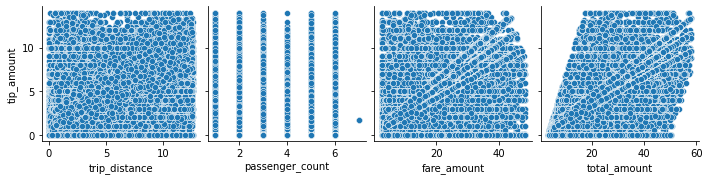

In [22]:
corr = np.corrcoef(y_01_fare['trip_distance'], y_01_fare['tip_amount'])
print(corr)

pp = sns.pairplot(data=y_01_fare,
                  y_vars=['tip_amount'],
                  x_vars=['trip_distance', 'passenger_count', 'fare_amount', 'total_amount'])

# tip count by region

In [36]:
loc_tip_s1 = tips_sample.groupby('PUloc')['tip_amount'].agg('sum')
loc_tip_s1 = pd.DataFrame(loc_tip_s1, index = loc_tip_s1.index)
loc_tip_s1['count'] = tips_sample['PUloc'].value_counts().sort_index()
loc_tip_s1['avg'] = loc_tip_s1['tip_amount'] / loc_tip_s1['count']
loc_tip_s1

,tip_amount,count,avg
PUloc,,,
1,18.07,8,2.258750
3,14.85,44,0.337500
4,22701.54,15728,1.443384
5,1.86,1,1.860000
6,3.15,5,0.630000
...,...,...,...
261,76152.29,41835,1.820301
262,118844.96,84890,1.399988
263,185359.01,137214,1.350875


In [27]:

# y_01_fare.groupby(['DOloc', 'Fruit'])['Number'].agg('sum')
loc_tip_s1 = tips_sample.groupby('PUloc')['tip_amount'].agg('sum')
loc_tip_s1 = pd.DataFrame(loc_tip_s1, index = loc_tip_s1.index)
loc_tip_s1['count'] = tips_sample['PUloc'].value_counts().sort_index()
loc_tip_s1.tip_amount = pd.to_numeric(tips_sample.tip_amount, errors='coerce')
loc_tip_s1.count = pd.to_numeric(loc_tip_s1.count, errors='coerce')
#loc_tip_s1['avg'] = loc_tip_s1['tip_amount'] / loc_tip_s1['count']
loc_tip_s1

,tip_amount,count
PUloc,,
1,2.70,8
3,4.36,44
4,1.00,15728
5,0.00,1
6,1.65,5
...,...,...
261,2.66,41835
262,1.65,84890
263,0.00,137214


In [12]:
loc_tip_s2 = y_s2_fare.groupby('DOloc')['tip_amount'].agg('sum')
loc_tip_s2 = pd.DataFrame(loc_tip_s2, index = loc_tip_s2.index)
loc_tip_s2['count'] = y_s2_fare['DOloc'].value_counts().sort_index()
loc_tip_s2.tip_amount = pd.to_numeric(loc_tip_s2.tip_amount, errors='coerce')
loc_tip_s2.count = pd.to_numeric(loc_tip_s2.count, errors='coerce')
loc_tip_s2['avg'] = loc_tip_s2['tip_amount'] / loc_tip_s2['count']

In [13]:
loc_tip_s3 = y_s3_fare.groupby('DOloc')['tip_amount'].agg('sum')
loc_tip_s3 = pd.DataFrame(loc_tip_s3, index = loc_tip_s3.index)
loc_tip_s3['count'] = y_s3_fare['DOloc'].value_counts().sort_index()
loc_tip_s3.tip_amount = pd.to_numeric(loc_tip_s3.tip_amount, errors='coerce')
loc_tip_s3.count = pd.to_numeric(loc_tip_s3.count, errors='coerce')
loc_tip_s3['avg'] = loc_tip_s3['tip_amount'] / loc_tip_s3['count']

In [15]:
import geopandas as gpd
sf = gpd.read_file("/Users/miayokka0926/Desktop/MAST30034_Python/data/taxi_zones/taxi_zones.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
sf


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [14]:
gdf_loc_tip_s1 = gpd.GeoDataFrame(pd.merge(loc_tip_s1, sf, left_on=loc_tip_s1.index, right_on='LocationID')).drop('LocationID',axis=1)
gdf_loc_tip_s2 = gpd.GeoDataFrame(pd.merge(loc_tip_s2, sf, left_on=loc_tip_s2.index, right_on='LocationID')).drop('LocationID',axis=1)
gdf_loc_tip_s3 = gpd.GeoDataFrame(pd.merge(loc_tip_s3, sf, left_on=loc_tip_s2.index, right_on='LocationID')).drop('LocationID',axis=1)

gdf_loc_tip_s3

,tip_amount,count,avg,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,27.02,33,0.818788,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,12.40,6,2.066667,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,966.25,477,2.025681,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,146970.73,106448,1.380681,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,0.00,2,0.000000,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...,...,...
253,1141.95,745,1.532819,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
254,29024.48,23479,1.236189,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
255,205351.67,110889,1.851867,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
256,388532.50,259574,1.496808,262,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [37]:
gdf_loc_tip_s1 = gpd.GeoDataFrame(pd.merge(loc_tip_s1, sf, left_on=loc_tip_s1.index, right_on='LocationID')).drop('LocationID',axis=1)
gdf_loc_tip_s1

,tip_amount,count,avg,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,18.07,8,2.258750,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,14.85,44,0.337500,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
2,22701.54,15728,1.443384,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
3,1.86,1,1.860000,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
4,3.15,5,0.630000,6,0.150491,0.000606,Arrochar/Fort Wadsworth,Staten Island,"POLYGON ((-74.06367 40.60220, -74.06351 40.602..."
...,...,...,...,...,...,...,...,...,...
247,21.09,62,0.340161,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
248,2838.52,3714,0.764276,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
249,76152.29,41835,1.820301,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
250,118844.96,84890,1.399988,262,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


<function matplotlib.pyplot.show(close=None, block=None)>

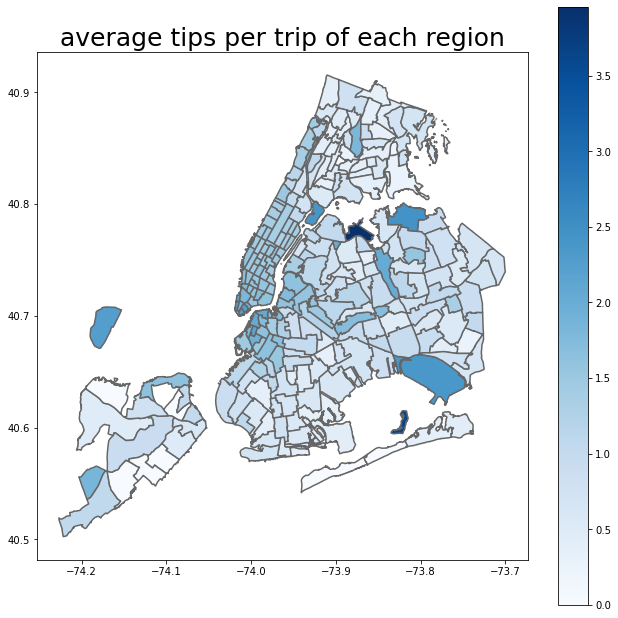

In [39]:
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s1['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('average tips per trip of each region', fontsize=25)

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s1.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/average tips per trip of each region.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

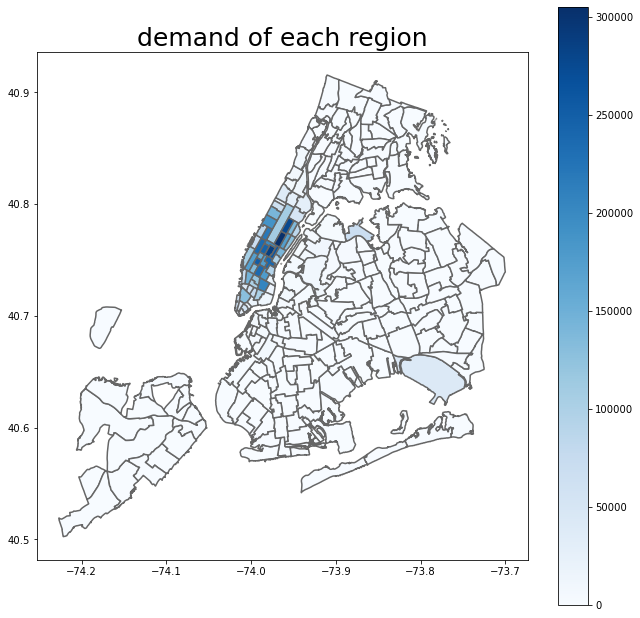

In [40]:
y_var = "count"
vmin, vmax = 0, gdf_loc_tip_s1['count'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('demand of each region', fontsize=25)

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s1.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/demand of each region.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

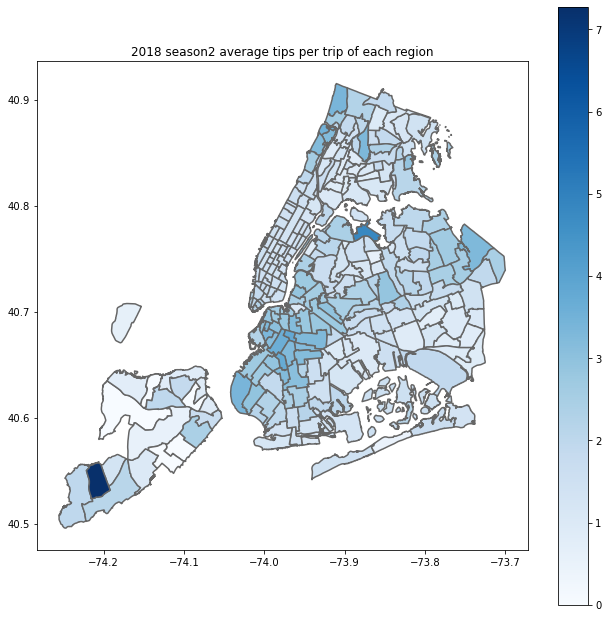

In [15]:
# s2
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s2['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('2018 season2 average tips per trip of each region')

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s2.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/2018 season2 average tips per trip of each region.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

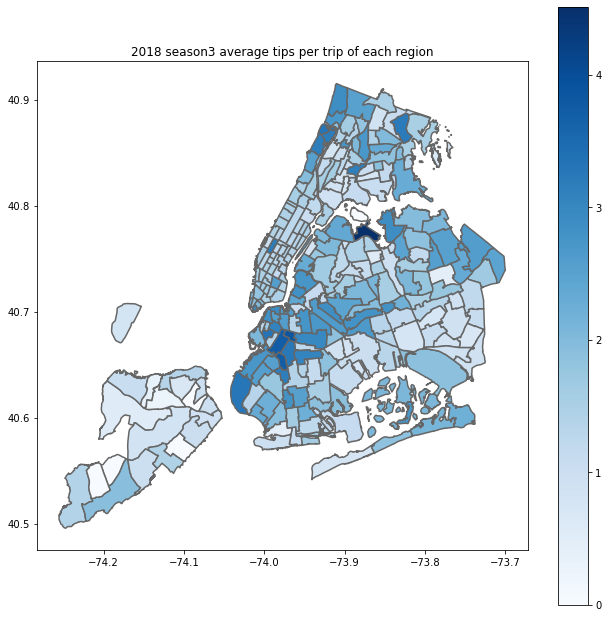

In [16]:
# s3
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s3['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('2018 season3 average tips per trip of each region')

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s3.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/2018 season3 average tips per trip of each region.png")
plt.show


# tips count by time in a day

In [16]:
loc_time_s1 = y_01_fare.groupby('DOtime')['tip_amount'].agg('sum')
loc_time = pd.DataFrame(loc_time, index = loc_time.index)
loc_time['count'] = y_01_fare['DOtime'].value_counts().sort_index()
loc_time.tip_amount = pd.to_numeric(loc_time.tip_amount, errors='coerce')
loc_time.count = pd.to_numeric(loc_time.count, errors='coerce')
loc_time['avg'] = loc_time['tip_amount'] / loc_time['count']

loc_time

,tip_amount,count,avg
DOtime,,,
00,415893.73,252359,1.648024
01,301609.02,187184,1.611297
02,221783.29,141423,1.568226
03,149865.65,100687,1.488431
04,101612.30,75753,1.341363
05,77143.28,67161,1.148632
06,172375.87,154910,1.112748
07,363901.21,280307,1.298224
08,542021.83,374570,1.447051


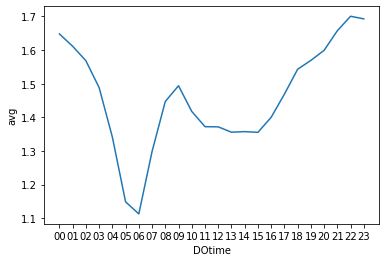

In [29]:
sns.lineplot(x = "DOtime", y = "avg", data = loc_time)

plt.show()

# Demand count by time on a day

In [ ]:
plt.lineplot(x = "DOtime", y = "count", data = loc_time, colour = 'slateblue')

plt.show()